### Análisis del Problema
El set de datos Titanic se considera una ejemplo básico y de consulta general para los estudiantes que desarrollan conocimientos en el área de estadísticas y principios del lenguaje R, sirve para la creación de totoriales en minería de datos y demostraciones de exploración y clasificación de modelos predictivos.

El set de datos está orientado a la predicción de sobrevivientes en la tragedia del hundimiento del **Transatlántico RMS Titanic**, entre la noche y madruga del 14 y 15 de abril de 1912, en la cual perdieron la vida 1496 personas de las 2208 que iban abordo del navío.

Para mayor detalle revisar el siguiente enlace: https://es.wikipedia.org/wiki/RMS_Titanic

Finalmente este conjunto de datos solo contiene las observaciones relacionadas con los pasajeros y no incluye datos de la tripulación.

### Descripción de los datos.
**Titanic Disaster Dataset** contiene 1309 observaciones sobre 14 variables, existen datos faltantes y para el estudio se descartaran variables.

| Variable | Descripción | Tipo | Longitud | Dominio |
|----------|-------------|------|----------|----------|
| **pclass** | Clase social-ecónomica de viaje | entero | 01 | 1 a 3 |
| **survived** | Sobreviviente | entero | 01 | 0 a 1 |
| **name** | Nombre del pasajero | cadena | 45 | texto Continuo |
| **sex** | Sexo del pasajero | cadena | 06 | male o female |
| **age** | Edad del pasajero | flotante | 07 | 0.17 a 80 |
| **sibsp** | # hermanos o conyuges que viajan juntos | entero | 01 | 0 a 8 |
| **parch** | # de hijos que viajan con algún padre | entero | 01 | 0 a 9 |
| **ticket** | # de tiquete | cadena | 09 | texto continuo |
| **fare** | Tarifa pagada | flotante | 08 | 0 a 512.3292 |
| **cabin** | Cabina o cuarto asignado | cadena | 10 | texto continuo |
| **embarked** | Puerto de embarque del pasajero | char | 01 | ' ', C, Q, S |
| **boat** | # de bote solo si sobrevivió el pasajero | entero | 01 | 1 a 3 |
| **body** | # de cuerpo si no sobrevivió y se encontró | entero | 01 | 1 a 3 |
| **home.dest** | Origen y destino del pasajero | cadena | 25 | múltiples valores |

### Librerías de uso

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Carga y prepara datos

In [2]:
import os

# Concatena la ruta actual del proyecto con la carpeta de datos locales
ruta = os.path.join(os.getcwd(), 'data')

# establece ruta de los datos
os.chdir(ruta)

# carga de datos desde el archivo fuente
dat_Originales = pd.read_excel('titanic3.xlsx', sheet_name=0)

# elimina los datos no significativos para estudios.
datos = dat_Originales.iloc[:, [0, 1, 3, 4, 5, 6, 10]].copy()

# exploración rápida de los datos
datos.head(n=30)

,pclass,survived,sex,age,sibsp,parch,embarked
0,1,1,female,29.0000,0,0,S
1,1,1,male,0.9167,1,2,S
2,1,0,female,2.0000,1,2,S
3,1,0,male,30.0000,1,2,S
4,1,0,female,25.0000,1,2,S
5,1,1,male,48.0000,0,0,S
6,1,1,female,63.0000,1,0,S
7,1,0,male,39.0000,0,0,S
8,1,1,female,53.0000,2,0,S
9,1,0,male,71.0000,0,0,C


In [3]:
# asigna a los campos faltantes un valor de cero,
# cualquiera de las siguientes 3 instrucciones hacen lo mismo
datos['age'].fillna(datos['age'].median(), inplace=True)
# datos.loc[datos['age'].isna(), 'age'] = datos['age'].median()
# datos.iloc[datos.iloc[:, 3].isna(), 3] = datos['age'].median()

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305    28.0000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [4]:
# crea el intervalo de años para definir la clasificación de la observacion por rangos de edad
niveles = [-np.inf, 15, 25, 35, 45, 55, 65, 75, np.inf]

# crea las etiquetas para la clasificacion de edad por rangos
etiquetas = ["0 - 15", "16 - 25", "26 - 35", "36 - 45", "46 - 55", '56 - 65', '66 - 75', '76 - 85']

# crea una nueva columna llamada Fac_Edad, basada en el campo age, aplicando los 
# niveles y asignando las etiquetas.
datos['Fac_Edad'] = pd.cut(datos['age'], bins=niveles, labels=etiquetas)

# crea los factores sobre las variables de las observaciones
datos['pclass'] = datos['pclass'].astype('category')
datos['survived'] = datos['survived'].astype('category')
datos['sex'] = datos['sex'].astype('category')
datos['embarked'] = datos['embarked'].astype('category')
datos['Fac_Edad'] = datos['Fac_Edad'].astype('category')

# imprime como tabla la estructura del set de datos
datos.info()

<class 'pandas.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   category
 1   survived  1309 non-null   category
 2   sex       1309 non-null   category
 3   age       1046 non-null   float64 
 4   sibsp     1309 non-null   int64   
 5   parch     1309 non-null   int64   
 6   embarked  1307 non-null   category
 7   Fac_Edad  1046 non-null   category
dtypes: category(5), float64(1), int64(2)
memory usage: 37.3 KB


### Análisis de datos.
#### Medidas de tendencia.

In [5]:
# calculando la media de la edad
media = datos['age'].mean()

# calculando la mediana de la edad
mediana = datos['age'].median()

# calculando la varianza
varianza = datos['age'].var()

# calculando la desviación estandar
desviacion = datos['age'].std()

# calcualando los cuartiles
cuartil = datos['age'].quantile(0.75) - datos['age'].quantile(0.25)

# imprimiendo valores
print('La edad promedio es........: ', media)
print('La edad mas reperitda es...: ', mediana)
print('La varianza de la edad es..: ', varianza)
print('La desviación estandar es..: ', desviacion)
print('El valor del cuartil es....: ', cuartil)

La edad promedio es........:  29.8811345124283
La edad mas reperitda es...:  28.0
La varianza de la edad es..:  207.74897359969773
La desviación estandar es..:  14.413499699923602
El valor del cuartil es....:  18.0


#### Distribución de observaciónes por el rango de edades.

Fac_Edad
0 - 15     115
16 - 25    328
26 - 35    281
36 - 45    167
46 - 55     96
56 - 65     49
66 - 75      8
76 - 85      2
Name: count, dtype: int64


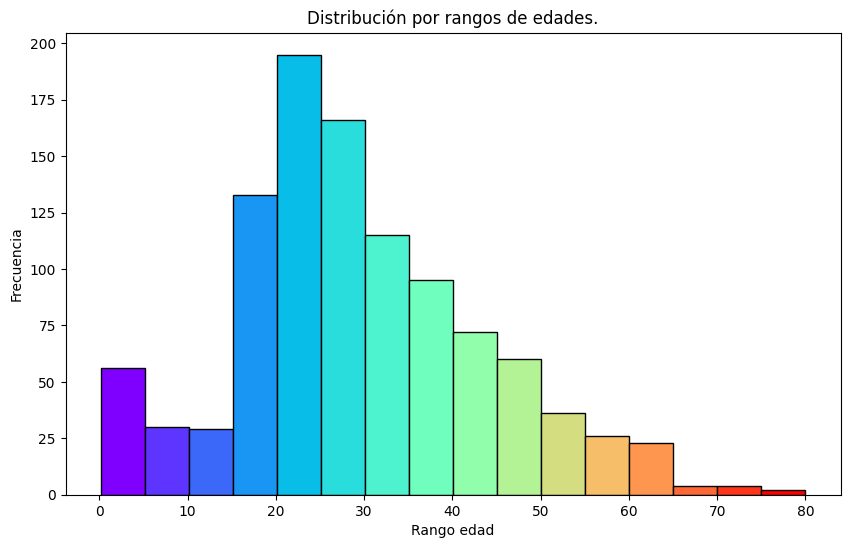

In [6]:
# usando histogramas para representar la distribución de un variable numérica
print(datos['Fac_Edad'].value_counts().sort_index())

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(datos['age'], bins=16, edgecolor='black')

# Colorea cada barra con colores del arcoíris
colors = cm.rainbow(np.linspace(0, 1, len(patches)))
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

plt.title('Distribución por rangos de edades.')
plt.xlabel('Rango edad')
plt.ylabel('Frecuencia')
plt.show()

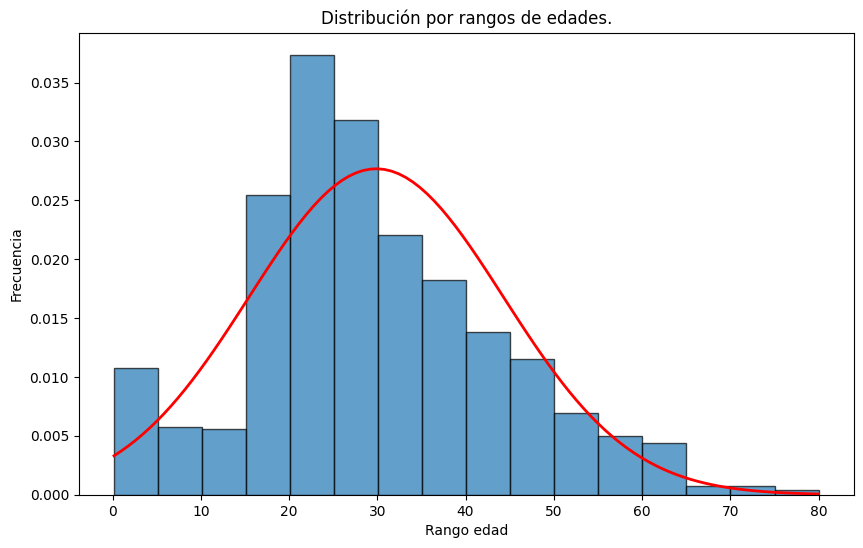

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(datos['age'], bins=16, density=True, alpha=0.7, edgecolor='black')
plt.title('Distribución por rangos de edades.')
plt.xlabel('Rango edad')
plt.ylabel('Frecuencia')

# Añade curva normal
mu = datos['age'].mean()
sigma = datos['age'].std()
x = np.linspace(datos['age'].min(), datos['age'].max(), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2)
plt.show()

#### Distribución de observaciónes por la varaible de supervivencia.

survived
0    809
1    500
Name: count, dtype: int64


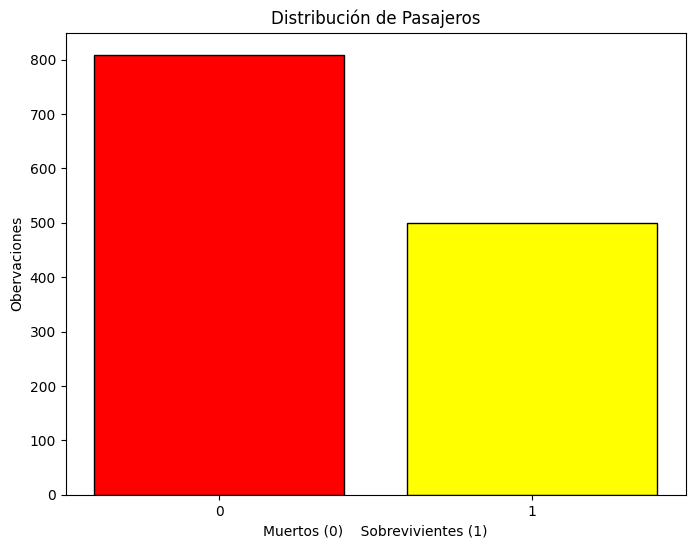

In [8]:
print(datos['survived'].value_counts())

plt.figure(figsize=(8, 6))
survived_counts = datos['survived'].value_counts().sort_index()
plt.bar(range(len(survived_counts)), survived_counts.values, color=['red', 'yellow'], edgecolor='black')
plt.title('Distribución de Pasajeros')
plt.ylabel('Obervaciones')
plt.xlabel('Muertos (0)    Sobrevivientes (1)')
plt.xticks(range(len(survived_counts)), survived_counts.index)
plt.show()

#### Relación de la tasa de supervivencia de acuerdo al sexo.

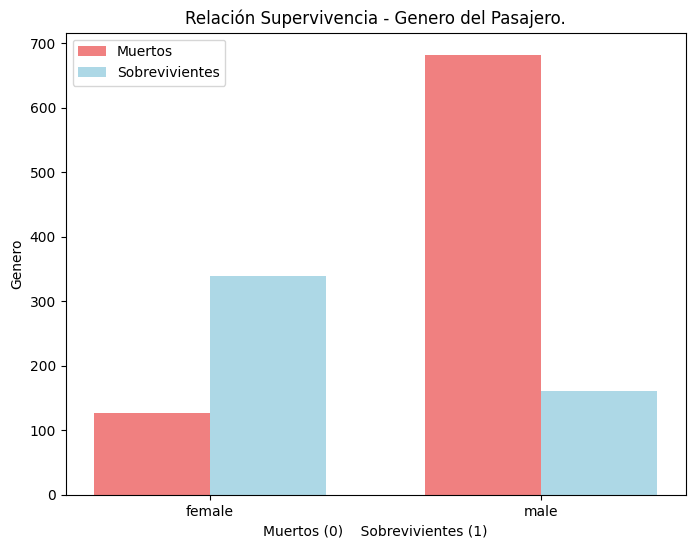

In [9]:
# Crea tabla de contingencia
tabla_sexo = pd.crosstab(datos['sex'], datos['survived'])

plt.figure(figsize=(8, 6))
x_pos = np.arange(len(tabla_sexo.index))
width = 0.35

plt.bar(x_pos - width/2, tabla_sexo[0], width, label='Muertos', color='lightcoral')
plt.bar(x_pos + width/2, tabla_sexo[1], width, label='Sobrevivientes', color='lightblue')

plt.title('Relación Supervivencia - Genero del Pasajero.')
plt.xlabel('Muertos (0)    Sobrevivientes (1)')
plt.ylabel('Genero')
plt.xticks(x_pos, tabla_sexo.index)
plt.legend()
plt.show()

#### Relación de la tasa de supervivientes de acuerdo a la edad.

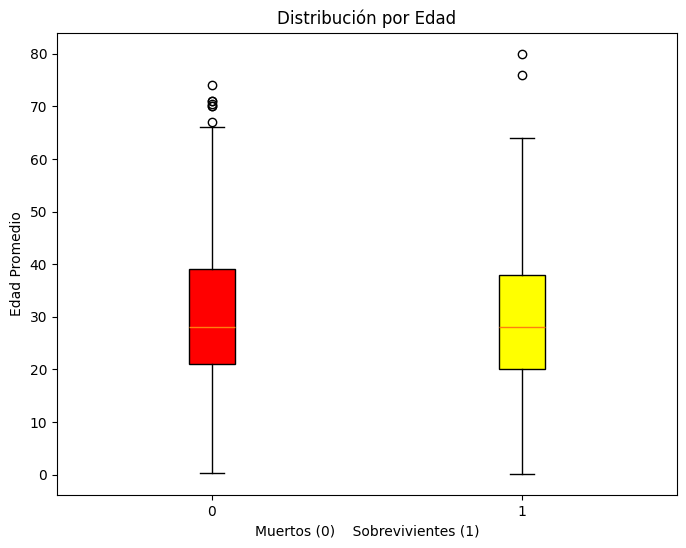

In [10]:
plt.figure(figsize=(8, 6))
box_data = [datos[datos['survived'] == 0]['age'].dropna(), 
            datos[datos['survived'] == 1]['age'].dropna()]

bp = plt.boxplot(box_data, labels=['0', '1'], patch_artist=True)

# Colorear las cajas
bp['boxes'][0].set_facecolor('red')
bp['boxes'][1].set_facecolor('yellow')

plt.title('Distribución por Edad')
plt.xlabel('Muertos (0)    Sobrevivientes (1)')
plt.ylabel('Edad Promedio')
plt.show()

#### Relación de la tasa de supervivientes de acuerdo a la clase social.

<Figure size 1000x600 with 0 Axes>

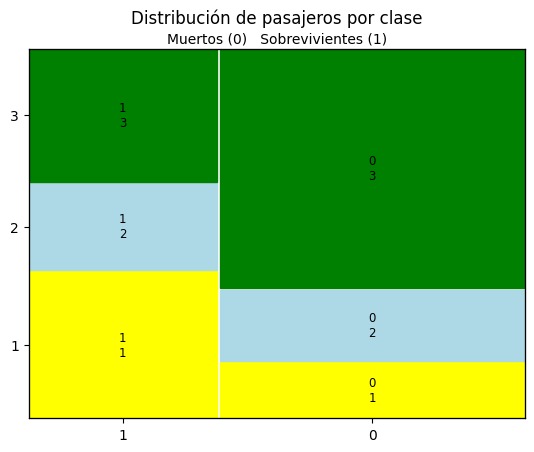

In [11]:
# Gráfico de mosaico
plt.figure(figsize=(10, 6))
mosaic(datos, ['survived', 'pclass'],
       title='Distribución de pasajeros por clase',
       properties=lambda key: {'color': ['yellow', 'lightblue', 'green'][int(key[1])-1]})
plt.xlabel('Muertos (0)   Sobrevivientes (1)')
plt.ylabel('Clases')
plt.show()

#### Relación de la tasa de supervivientes de acuerdo a la clase social usando ggplot2.

<Figure size 1000x600 with 0 Axes>

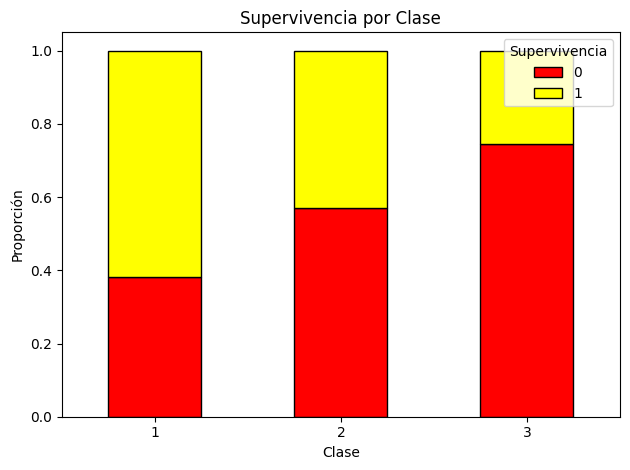

In [12]:
# Equivalente a ggplot usando pandas y matplotlib
tabla_prop = pd.crosstab(datos['pclass'], datos['survived'], normalize='index')

plt.figure(figsize=(10, 6))
tabla_prop.plot(kind='bar', stacked=True, color=['red', 'yellow'], edgecolor='black')
plt.title('Supervivencia por Clase')
plt.ylabel('Proporción')
plt.xlabel('Clase')
plt.xticks(rotation=0)
plt.legend(title='Supervivencia', labels=['0', '1'])
plt.tight_layout()
plt.show()

#### Generando modelo predictivo para determinar si un pasajero puede sobrevivir o no al naufragio del RMS Titanic.

In [13]:
# Preparación de datos
# Elimina filas con valores faltantes en embarked
datos_modelo = datos.dropna(subset=['embarked']).copy()

# Codifica variables categóricas a numéricas
datos_modelo['sex_num'] = datos_modelo['sex'].map({'male': 0, 'female': 1})
datos_modelo['pclass_num'] = datos_modelo['pclass'].astype(int)
datos_modelo['survived_num'] = datos_modelo['survived'].astype(int)

# genera aleatoriedad en la selección de datos
np.random.seed(1024)

# Preparar datos para train_test_split - asegurar que no haya NaN
X = datos_modelo[['pclass_num', 'sex_num', 'age']].copy()
y = datos_modelo['survived_num'].copy()

# Verifica y elimina cualquier NaN restante
mask = ~(X.isna().any(axis=1) | y.isna())
X = X[mask]
y = y[mask]

# genera los segmentos de entrenamiento y prueba sobre los datos titanic
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1024, stratify=y)

# Combinar de nuevo para usar con los nombres originales
datatrain = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
datatest = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

# Genera una tabla para demostrar la relación existente entre los datos de entrenamiento del 70% y 
# los datos de prueba del 30% con respecto a la variable de proyección

# Imprime las dimensiones o longitudes de ambos datasets
print(datatrain.shape)
print(datatest.shape)

# Imprime la proporción de la variable objetivo para el dataset de entrenamiento
print("\nProporción datatrain:")
print(y_train.value_counts(normalize=True))

# Imprime la proporción de la variable objetivo para el dataset de entrenamiento
print("\nProporción datatest:")
print(y_test.value_counts(normalize=True))

(730, 4)
(314, 4)

Proporción datatrain:
survived_num
0    0.593151
1    0.406849
Name: proportion, dtype: float64

Proporción datatest:
survived_num
0    0.592357
1    0.407643
Name: proportion, dtype: float64


In [14]:
# Creación del modelo de regresión logística, se usa con variables categóricas y
# no valores numéricos continuos
modelo = LogisticRegression(max_iter=1000, random_state=1024)
modelo.fit(X_train, y_train)

#Imprime resumen
print("Coeficientes:")
print(f"  pclass: {modelo.coef_[0][0]:.4f}")
print(f"  sex: {modelo.coef_[0][1]:.4f}")
print(f"  age: {modelo.coef_[0][2]:.4f}")
print(f"Intercepto: {modelo.intercept_[0]:.4f}")

Coeficientes:
  pclass: -1.0583
  sex: 2.4036
  age: -0.0344
Intercepto: 1.9396


In [15]:
# Usando el modelo genera variable con nivel de probabilidad
posiMorir = modelo.predict_proba(X_test)[:, 1]

# modelo ingenuo predice el valor más probable
# la mayor parte de las observaciones arrojan valor 0 o sea existe mayor probabilidad de morir
print(y_test.value_counts())
mdlPred = np.zeros(len(y_test))

# resultado del modelo ingenuo o de regresión logistica, para calcular el nivel de sensibilidad, especificidad y exactitud
print('\nDistribución de observaciones, aplicando el modelo ingenuo')
print(pd.crosstab(y_test, mdlPred, rownames=['survived'], colnames=['mdlPred']))
print('\n')

# imprime la matriz de confusion
print('Matriz de confusión')
predicciones = (posiMorir >= 0.5).astype(int)
print(pd.crosstab(y_test, predicciones, rownames=['survived'], colnames=['predicho >= 0.5']))

# crea la matriz de confusion en variable local
mc = confusion_matrix(y_test, predicciones)
print("\n")
print(pd.DataFrame(mc, index=['Real=0', 'Real=1'], columns=['Pred=0', 'Pred=1']))

survived_num
0    186
1    128
Name: count, dtype: int64

Distribución de observaciones, aplicando el modelo ingenuo
mdlPred   0.0
survived     
0         186
1         128


Matriz de confusión
predicho >= 0.5    0   1
survived                
0                159  27
1                 42  86


        Pred=0  Pred=1
Real=0     159      27
Real=1      42      86


In [16]:
# calcula la presicion global del proyecto
print('\n')
print('Presición Gobal\t\t\tValor\t\t%')

pg_sumdg = mc[0,0] + mc[1,1]
pg_porce = (100/len(y_test)) * pg_sumdg

print(f'Observaciones\t\t\t{len(y_test)}\t\t{100}')
print(f'Suma diagonales\t\t\t{pg_sumdg}\t\t{pg_porce:.2f}')


# calcula la presicion positiva del si
print('\n')
print('Presición Positiva del Sí\tValor\t\t%')

ps_totalsi = mc[1,0] + mc[1,1]
ps_solosi = mc[1,1]
ps_nocsi = mc[1,0]
ps_factor = 100/ps_totalsi

print(f'Observaciones\t\t\t{ps_totalsi}\t\t{100}')
print(f'Si esperando un si\t\t{ps_solosi}\t\t{ps_factor*ps_solosi:.2f}')
print(f'No esperando un si\t\t{ps_nocsi}\t\t{ps_factor*ps_nocsi:.2f}')


# calcula la presicion negativa del no
print('\n')
print('Presición Negativa del No\tValor\t\t%')

pn_totalno = mc[0,0] + mc[0,1]
pn_solono = mc[0,0]
pn_sicno = mc[0,1]
pn_factor = 100/pn_totalno

print(f'Observaciones\t\t\t{pn_totalno}\t\t{100}')
print(f'No esperando un no\t\t{pn_solono}\t\t{pn_factor*pn_solono:.2f}')
print(f'Si esperando un no\t\t{pn_sicno}\t\t{pn_factor*pn_sicno:.2f}')

# calcula el error de clasificación
real = y_test
predicho = predicciones
error_clasificacion = np.mean(predicho != real)
print(f"\nEl error del modelo es de: {error_clasificacion * 100:.2f}%")



Presición Gobal			Valor		%
Observaciones			314		100
Suma diagonales			245		78.03


Presición Positiva del Sí	Valor		%
Observaciones			128		100
Si esperando un si		86		67.19
No esperando un si		42		32.81


Presición Negativa del No	Valor		%
Observaciones			186		100
No esperando un no		159		85.48
Si esperando un no		27		14.52

El error del modelo es de: 21.97%


### Otra forma de presentar la matriz de confusión

In [17]:
from sklearn.metrics import classification_report

real = y_test
predicho = predicciones

print(classification_report(real, predicho))
print("\nMatriz de confusión:")
print(pd.DataFrame(mc, index=['Real=0', 'Real=1'], columns=['Pred=0', 'Pred=1']))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       186
           1       0.76      0.67      0.71       128

    accuracy                           0.78       314
   macro avg       0.78      0.76      0.77       314
weighted avg       0.78      0.78      0.78       314


Matriz de confusión:
        Pred=0  Pred=1
Real=0     159      27
Real=1      42      86


### Graficando la matriz de confusión

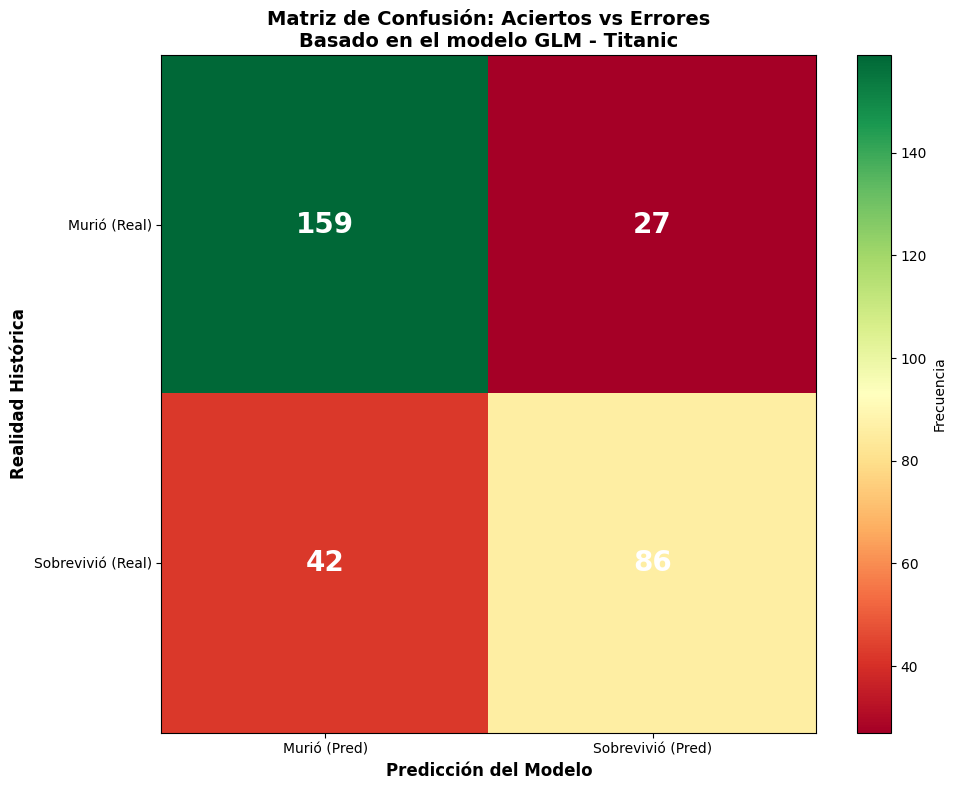

In [18]:
# transforma la matriz de confusión a un dataframe
df_mc = pd.DataFrame({
    'Real': ['0', '0', '1', '1'],
    'Predicho': ['False', 'True', 'False', 'True'],
    'Frecuencia': [mc[0,0], mc[0,1], mc[1,0], mc[1,1]]
})

# define las etiquetas que mostrara la gráfica
df_mc['Real'] = df_mc['Real'].map({'0': 'Murió (Real)', '1': 'Sobrevivió (Real)'})
df_mc['Predicho'] = df_mc['Predicho'].map({'False': 'Murió (Pred)', 'True': 'Sobrevivió (Pred)'})

# crea la gráfica
import matplotlib.pyplot as plt

# Prepara datos para heatmap
pivot_table = df_mc.pivot(index='Real', columns='Predicho', values='Frecuencia')

plt.figure(figsize=(10, 8))
plt.imshow(pivot_table.values, cmap='RdYlGn', aspect='auto')
plt.colorbar(label='Frecuencia')

# Añade valores en cada celda
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, int(pivot_table.values[i, j]), 
                ha='center', va='center', color='white', fontsize=20, weight='bold')

plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.xlabel('Predicción del Modelo', fontsize=12, weight='bold')
plt.ylabel('Realidad Histórica', fontsize=12, weight='bold')
plt.title('Matriz de Confusión: Aciertos vs Errores\nBasado en el modelo GLM - Titanic', 
          fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

### Resultados.
A pesar de que el modelo ingenuo es considerado como un modelo de baja precisión, este demuestra que si es posible determinar si un pasajero puede sobrevivir o no al hundimiento del RMS Titanic